**ESTUDIO DE LOS FRACTALES: El conjunto de Mandelbrot**

*Introducción: ¿Qué es un fractal?*

- Los fractales son estructuras matemáticas que se repiten indefinidamente en diferentes escalas. 
- Aunque el concepto puede sonar extraño o complejo, en realidad es un fenómeno muy comun en la naturaleza (por ejemplo, la forma de la hoja de un helecho se repite en cada una de sus hojas más pequeñas, y así indefinidamente). 
- El término "fractal" fue acuñado por el matemático Benoît Mandelbrot, inventor del fractal que implementaremos en Python: **El conjunto de Mandelbrot**

*Condiciones iniciales*

- El conjunto de Mandelbrot contiene la serie de números complejos que van surgiendo al aplicar una y otra vez (**iterar**) la ecuación siguiente:
$$
Z(n+1) = Z_n^2 + C
$$
- Se deben cumplir dos condiciones adicionales:
1. $Z_0$ = 0
2. El número complejo C, que da pie a la iteración no genere una serie de números cada vez mayores, cuyo límite tienda a infinito.

- En otras palabras, para determinar si un número complejo "C" pertenece al conjunto debe verificar las condiciones anteriores. A partir de ese momento, C permanecerá constante al iterar la secuencia.

In [ ]:
"""EJEMPLO_1:"""

def z(n,c):
    if n == 0:
        return 0
    else:
        return z(n-1,c)**2 + c

for n in range(10):
    print(f"z({n}) = {z(n, c=1)}") #Llamamos a la función con un c = 1

"""La función z(n,c) devuelve el n-ésimo elemento de la secuencia. 'n' sería el índice del número que queremos calcular y 'c' es un número fijo que estamos probando."""

z(0) = 0
z(1) = 1
z(2) = 2
z(3) = 5
z(4) = 26
z(5) = 677
z(6) = 458330
z(7) = 210066388901
z(8) = 44127887745906175987802
z(9) = 1947270476915296449559703445493848930452791205


Para c = 1, se puede observar la rápida tasa de crecimiento de los elementos. En menos de diez interacciones, nuestro número complejo se dispará hacia el infinito. Esto nos indica que c = 1 **no pertenece al conjunto de Mandelbrot**

*Representación gráfica del conjunto de Mandelbrot (con Matplotlib)*

C:\Users\nalda\AppData\Local\Temp\ipykernel_9512\3853420543.py:12: RuntimeWarning: overflow encountered in square
  z = z**2 + c #esta operación se realiza para todos los elementos de la matriz "c" en cada iteración
C:\Users\nalda\AppData\Local\Temp\ipykernel_9512\3853420543.py:12: RuntimeWarning: invalid value encountered in square
  z = z**2 + c #esta operación se realiza para todos los elementos de la matriz "c" en cada iteración


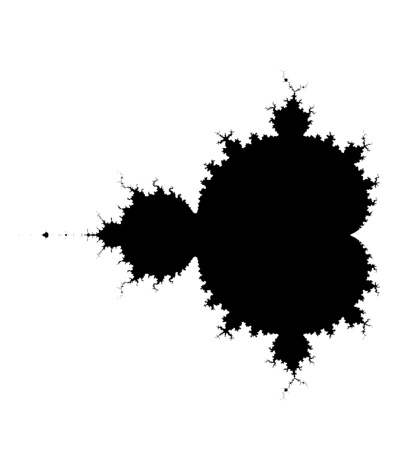

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def complex_matrix(x_min, x_max, y_min, y_max, pixel_density):
    re = np.linspace(x_min, x_max, int((x_max - x_min)*pixel_density)) #obtenemos puntos en el eje horizontal entre un x_max y x_min
    im = np.linspace(y_min, y_max, int((y_max - y_min)*pixel_density)) #obtenemos puntos en el eje vertical entre un y_max y un y_min
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j #creamos una matriz bidimensional de números complejos encerrada en una área rectangular definida por los cuatros parámetos anteriores

def is_stable(c, num_iteraciones):
    z = 0
    for i in range(num_iteraciones):
        z = z**2 + c #esta operación se realiza para todos los elementos de la matriz "c" en cada iteración
    return (abs(z) <= 2) #devuelve valores booleanos 'True' o 'False'

def obtener_elementos(c, num_iteraciones):
    mask = is_stable(c, num_iteraciones)
    return c[mask]

c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
elementos = obtener_elementos(c, num_iteraciones=20)

#plt.scatter(elementos.real, elementos.imag, color="black", marker=",", s=1)
plt.imshow(is_stable(c, num_iteraciones=20), cmap="binary")
plt.gca().set_aspect("equal") #obtiene el eje actual con una misma escala para los ejes X e Y
plt.axis("off") #desactivo los ejes de la figura
plt.tight_layout() #ajusta automáticamente el diseño para que nada quede cortado o superpuesto
plt.show()

**Event**
Matplotlib genera un objeto event cuando ocurre una acción del usuario (como un clic). Este objeto contiene información como:
- **event.xdata**: coordenada X en el eje donde se hizo clic
- **event.ydata**: coordenada Y en el eje donde se hizo clic
- **event.inaxes**: indica si el clic ocurrió dentro de un subplot específico

```python
if event.inaxes == ax:
```
- Evita registrar clics fuera del gráfico

```python
points_x.append(event.xdata)
points_y.append(event.ydata)
```
- Guarda las coordenadas del clic en listas que almacenan los puntos.

```python
sc.set_offsets(list(zip(points_x, points_y)))
```
- zip(points_x, points_y) genera pares (x,y) -> creo coordenadas
- set_offsets() actualiza los puntos mostrados. Así, cada vez que haces clic, aparece un nuevo punto en el gráfico.

```python
fig.canvas.draw_idle()
```
- Redibuja la figura para mostrar los cambios sin bloquear la ejecución (a diferencia de un draw() normal).

C:\Users\joseantonio.hernande\AppData\Local\Temp\ipykernel_23144\1419447290.py:20: RuntimeWarning: overflow encountered in multiply
  z = z*z + c
C:\Users\joseantonio.hernande\AppData\Local\Temp\ipykernel_23144\1419447290.py:20: RuntimeWarning: invalid value encountered in multiply
  z = z*z + c


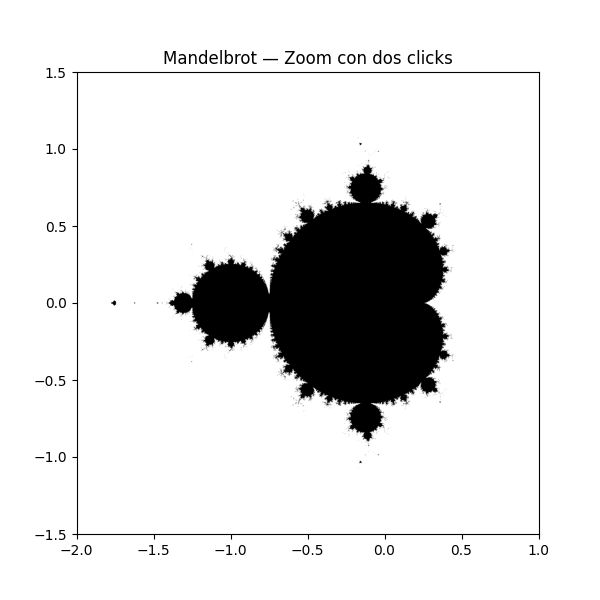

In [33]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# Guardamos initial_bounds y pixel_density
initial_bounds = [-2.0, 1.0, -1.5, 1.5]
pixel_density_init = 500

# ================================
# Funciones Mandelbrot
# ================================
def complex_matrix(x_min, x_max, y_min, y_max, pixel_density):
    re = np.linspace(x_min, x_max, int((x_max - x_min)*pixel_density))
    im = np.linspace(y_min, y_max, int((y_max - y_min)*pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

def iterate(c, num_iter):
    z = 0
    for _ in range(num_iter):
        z = z*z + c
    return abs(z) <= 2

def dibujar_mandelbrot(ax, bounds, pixel_density, num_iter=50):
    x_min, x_max, y_min, y_max = bounds
    c = complex_matrix(x_min, x_max, y_min, y_max, pixel_density)
    img = iterate(c, num_iter)
    ax.clear()
    ax.imshow(img, cmap="binary", extent=bounds, origin="lower")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect("equal")
    ax.set_title("Mandelbrot — Zoom con dos clicks")
    plt.draw()
    
# ================================
# Inicialización
# ================================
fig, ax = plt.subplots(figsize=(6, 6))
bounds = initial_bounds.copy()
dibujar_mandelbrot(ax, bounds, pixel_density_init)

clicks = []

# ================================
# Evento de clic para zoom por selección
# ================================
def onclick(event):
    global clicks, bounds
    if event.inaxes != ax:
        return
    clicks.append((event.xdata, event.ydata))
    # Cuando haya dos clics, definir rectángulo
    if len(clicks) == 2:
        (x1, y1), (x2, y2) = clicks
        # Normalizar valores
        x_min, x_max = sorted([x1, x2])
        y_min, y_max = sorted([y1, y2])
        
        # Forzar selección cuadrada
        center_x = (x_min + x_max) / 2
        center_y = (y_min + y_max) / 2
        side = max(x_max - x_min, y_max - y_min)
        x_min = center_x - side / 2
        x_max = center_x + side / 2
        y_min = center_y - side / 2
        y_max = center_y + side / 2

        bounds = [x_min, x_max, y_min, y_max]
        # Calcular nuevo pixel_density para zoom actual
        pixel_density_new = pixel_density_init * (initial_bounds[1] - initial_bounds[0]) / (x_max - x_min)
        dibujar_mandelbrot(ax, bounds, int(pixel_density_new))
        clicks = []

fig.canvas.mpl_connect("button_press_event", onclick)
plt.show()

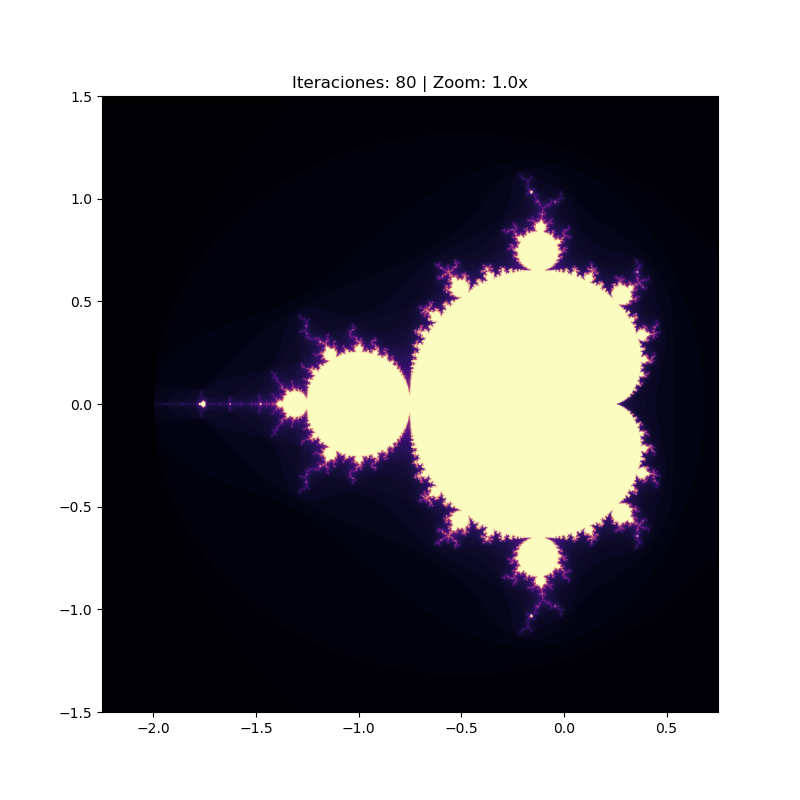

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector

# ================================
# Configuración Fija
# ================================
# Siempre generaremos una imagen de 1000x1000 puntos.
# Esto garantiza nitidez visual en pantallas estándar.
FIXED_PIXELS = 1000 
INITIAL_ITER = 80
# Definimos límites iniciales cuadrados para empezar bien
initial_center_x = -0.75
initial_center_y = 0.0
initial_radius = 1.5 # Ancho total 3.0
initial_bounds = [
    initial_center_x - initial_radius, 
    initial_center_x + initial_radius, 
    initial_center_y - initial_radius, 
    initial_center_y + initial_radius
]
initial_span = initial_bounds[1] - initial_bounds[0]

# ================================
# Funciones Mandelbrot
# ================================
def complex_matrix(x_min, x_max, y_min, y_max, pixels):
    # Aquí generamos siempre una matriz cuadrada
    re = np.linspace(x_min, x_max, pixels)
    im = np.linspace(y_min, y_max, pixels)
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

def iterate(c, num_iter):
    # Utilizamos una implementación vectorizada estándar
    z = np.zeros_like(c)
    div_time = np.zeros(c.shape, dtype=int)
    
    for i in range(num_iter):
        mask = abs(z) <= 2
        # Solo calculamos donde z todavía no ha divergido para ahorrar tiempo
        z[mask] = z[mask]*z[mask] + c[mask]
        div_time[mask] = i
        
    return div_time # Devolvemos el número de iteraciones para mejor color

def dibujar_mandelbrot(ax, bounds, num_iter):
    x_min, x_max, y_min, y_max = bounds
    
    # Generamos la matriz siempre con FIXED_PIXELS x FIXED_PIXELS
    c = complex_matrix(x_min, x_max, y_min, y_max, FIXED_PIXELS)
    
    img = iterate(c, num_iter)
    
    ax.clear()
    # 'extent' asegura que la imagen cuadrada se estire correctamente en las coordenadas
    ax.imshow(img, cmap="magma", extent=bounds, origin="lower", interpolation="bilinear")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect("equal") # Forzamos que matplotlib no deforme los ejes
    ax.set_title(f"Iteraciones: {num_iter} | Zoom: {(initial_span/(x_max-x_min)):.1f}x")
    ax.figure.canvas.draw_idle()

# ================================
# Lógica del Selector
# ================================
fig, ax = plt.subplots(figsize=(8, 8)) # Figura cuadrada
dibujar_mandelbrot(ax, initial_bounds, INITIAL_ITER)

def onselect(eclick, erelease):
    if eclick.xdata is None or erelease.xdata is None:
        return
    
    # 1. Obtener coordenadas puras de la selección
    x0, x1 = sorted([eclick.xdata, erelease.xdata])
    y0, y1 = sorted([eclick.ydata, erelease.ydata])
    
    # Evitar selecciones nulas
    if abs(x1 - x0) < 1e-12 or abs(y1 - y0) < 1e-12:
        return

    # 2. Lógica para FORZAR UN CUADRADO
    # Calculamos el centro del rectángulo seleccionado
    center_x = (x0 + x1) / 2
    center_y = (y0 + y1) / 2
    
    # Tomamos la dimensión MÁS GRANDE de la selección
    width = x1 - x0
    height = y1 - y0
    side = max(width, height)

    # Definimos los nuevos límites basándonos en el centro y el lado mayor
    # Esto crea un cuadrado perfecto centrado en tu selección
    new_half_side = side / 2
    new_bounds = [
        center_x - new_half_side,
        center_x + new_half_side,
        center_y - new_half_side,
        center_y + new_half_side
    ]

    # 3. Calcular nuevas iteraciones (Crítico para evitar "bloques" en el borde)
    # Cuanto más pequeño es el 'side', más iteraciones necesitamos.
    zoom_factor = initial_span / side
    new_iter = int(INITIAL_ITER + 40 * np.log2(zoom_factor))
    new_iter = min(new_iter, 2500) # Tope de seguridad

    # Dibujamos pasando siempre FIXED_PIXELS (1000)
    dibujar_mandelbrot(ax, new_bounds, new_iter)

# Limpieza de selectores previos
_existing = globals().get('rect_selector', None)
if _existing is not None:
    try:
        _existing.set_active(False)
    except:
        pass

# Add RectangleSelector to the axes
rect_selector = RectangleSelector(
    ax, onselect,
    useblit=True,
    button=[1], 
    minspanx=5, minspany=5,
    spancoords='pixels',
    interactive=True,
    # Opcional: dibujar el rectángulo selector visualmente cuadrado no es posible 
    # con RectangleSelector estándar fácilmente, pero la lógica interna lo corregirá al soltar.
    props=dict(facecolor='white', edgecolor='white', alpha=0.2, fill=True)
)

plt.show()
